In [1]:
import numpy as np
import pandas as pd
from netpixi.integration.gt import *
from regression.integration.gt import *
import math
from graph_tool import centrality, clustering
import regression as reg
from model import Model, data_dir, file_save_name

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
dir_ = 'votacao/'
data_file_name = 'camara_municipal_sp_sessoes_12_20.csv'
name_file_name = 'nomes.csv'

data_file_dir = dir_ + data_file_name
name_file_dir = dir_ + name_file_name

In [3]:
df = pd.read_csv(data_file_dir)
nm = pd.read_csv(name_file_dir)
centros = ['PTB', 'PP', 'PPS', 'PDT', 'PV', 'PSB', 'PHS', 'MDB', 'REDE', 'CIDADANIA', 'S/PARTIDO']

In [4]:
rec = pd.read_csv(data_dir + file_save_name + "_" + str(2017) + "_" + str(2020) + ".csv")

In [5]:
rec.drop(columns='Unnamed: 0', axis=1)

,id,betweenness,clustering,parlamentares,partido,extreme_party,success,gender
0,155,0.000073,0.981818,0.147059,PT,1,0.588235,0
1,160,0.002306,0.858974,0.147059,PT,1,0.555556,0
2,187,0.003156,0.904348,0.191176,PSDB,1,0.940845,0
3,220,0.005550,0.875116,0.058824,PR,1,0.924188,0
4,224,0.002885,0.914141,0.191176,PSDB,1,0.915942,0
...,...,...,...,...,...,...,...,...
63,2174,0.052702,0.560440,0.029412,PSC,1,0.717949,0
64,2180,0.000000,1.000000,0.147059,PT,1,0.333333,0
65,2185,0.051025,0.772727,0.058824,PSOL,1,0.532787,0
66,2186,0.003584,0.915854,0.191176,PSDB,1,0.982143,0


# Modelo A

In [6]:
result = reg.linear(data=rec, formula='clustering ~ parlamentares + gender')
display(result.micro_summary())

variable,coefficient,std error,p-value
parlamentares,0.580538,0.336259,0.089015
gender,0.046385,0.055608,0.407257


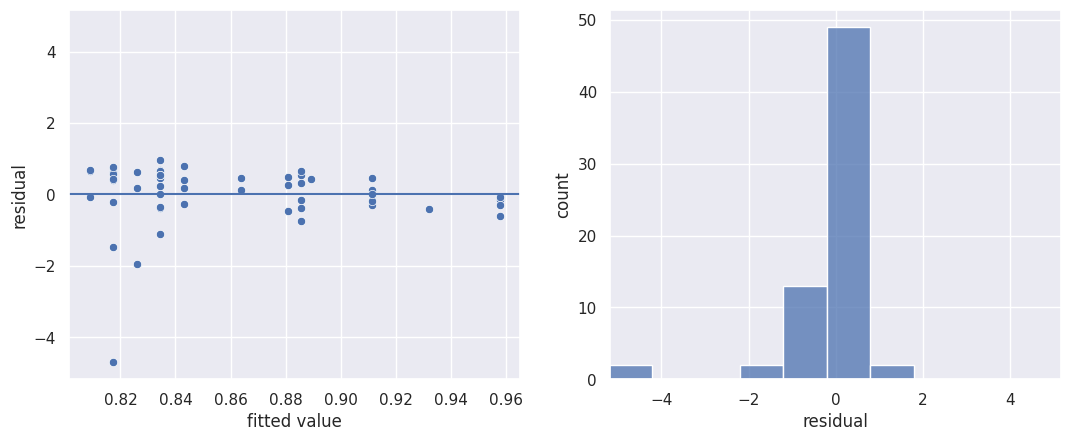

In [7]:
result.plot_residuals()

# Modelo B

In [8]:
result = reg.linear(data=rec, formula='clustering ~ extreme_party + gender')
display(result.micro_summary())

variable,coefficient,std error,p-value
extreme_party,0.004053,0.051503,0.937520
gender,0.056309,0.057307,0.329458


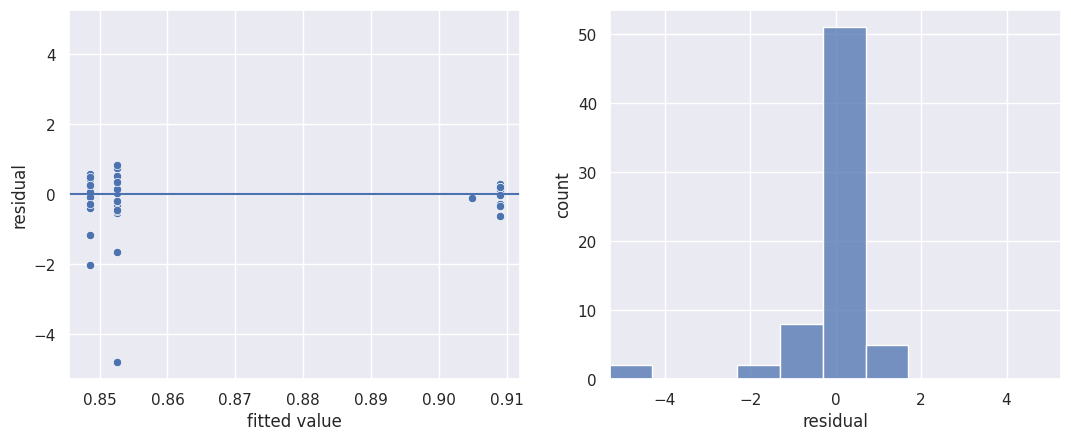

In [9]:
result.plot_residuals()

# Modelo C

In [10]:
result = reg.linear(data=rec, formula='betweenness ~ parlamentares')
display(result.micro_summary())

variable,coefficient,std error,p-value
parlamentares,-0.019842,0.048902,0.686237


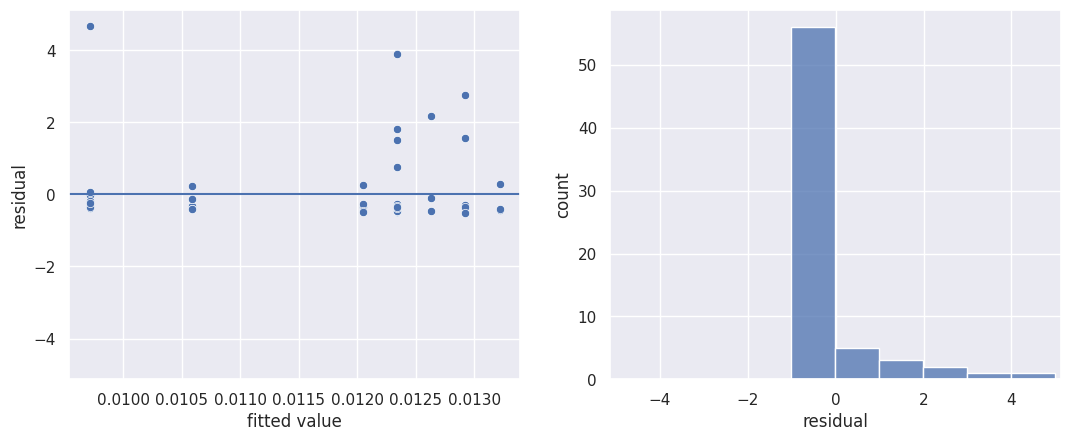

In [11]:
result.plot_residuals()

# Modelo D

In [12]:
result = reg.linear(data=rec, formula='clustering ~ parlamentares + extreme_party + gender')
display(result.micro_summary())

variable,coefficient,std error,p-value
parlamentares,0.717294,0.378898,0.062867
extreme_party,-0.044927,0.056750,0.431477
gender,0.052161,0.056244,0.357196


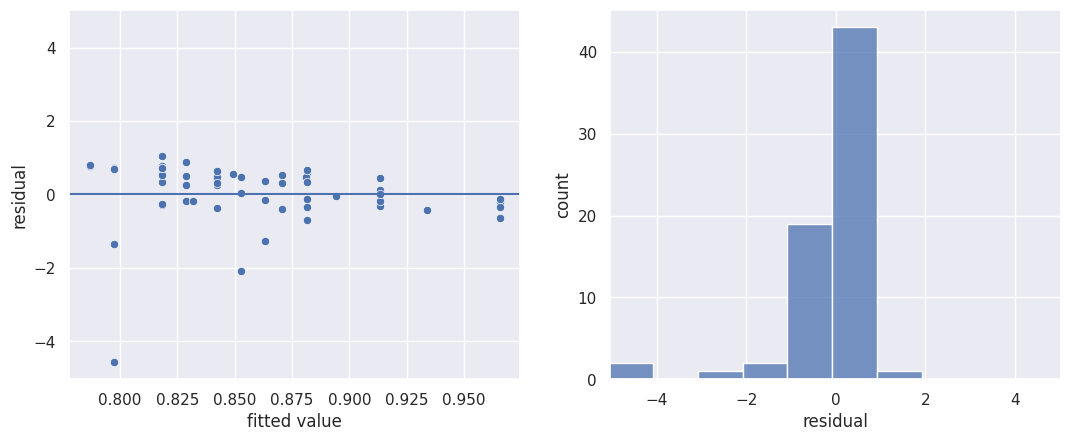

In [13]:
result.plot_residuals()